# password strength analysis 

# importing packages 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3 
import string 


# importing dataset from sql 

In [2]:
con=sqlite3.connect("password_data.sqlite")
data=pd.read_sql_query("SELECT * FROM Users",con)
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [3]:
data.shape

(100000, 3)

# data cleaning 

In [4]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [5]:
data.drop(["index"],axis=1,inplace=True)
data.head(2)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1


In [6]:
#checking duplicates 

data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [7]:
data.duplicated().sum()

0

In [8]:
#missing values checking 
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [9]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [10]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [11]:
data.isnull().any().sum()

0

In [12]:
#checking data types 
data.dtypes

password    object
strength     int64
dtype: object

In [13]:
#strenth analysis whether negative data present or not 

data["strength"].unique()

array([1, 2, 0], dtype=int64)

# sematic analysis

In [14]:
#1. numeric characters
#2 uppercase characters
#3 alphanumeric characters 
#4 title case characters 
#5 special characters 

In [15]:
#1. numeric characters

data.head(1)


,password,strength
0,zxe870819,1


In [16]:
data["password"][0]

'zxe870819'

In [17]:
type(data["password"][0])

str

In [18]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [19]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [20]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [21]:
#2 uppercase characters
data[data["password"].str.isupper()].shape

(1506, 2)

In [22]:
#3 alphanumeric characters 
data[data["password"].str.isalnum()].shape

(97203, 2)

In [23]:
#3.1 title characters 
data[data["password"].str.istitle()].shape

(932, 2)

In [24]:
#5 special characters  no direct function 

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def find_semantic(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass 
        

In [26]:
data["password"].apply(find_semantic)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [27]:
data["password"].apply(find_semantic)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [28]:
data[data["password"].apply(find_semantic)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [29]:
data[data["password"].apply(find_semantic)==1].shape

(2663, 2)

# feature engineering 

In [30]:
# strength length lower_freq upper_freq digit_freq special_char_freq

In [31]:
data["password"][0]

'zxe870819'

In [32]:
len(data["password"][0])

9

In [33]:
data["length"]=data["password"].str.len()

In [34]:
data

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8
...,...,...,...
99995,obejofi215,1,10
99996,fmiopvxb64,1,10
99997,czvrbun38,1,9
99998,mymyxe430,1,9


In [35]:
#lower freq find 

password="govind1234"
[char for char in password if char.islower()]

['g', 'o', 'v', 'i', 'n', 'd']

In [36]:
len([char for char in password if char.islower()])

6

In [37]:
len([char for char in password if char.islower()])/len(password)

0.6

In [38]:
#define funcions lower freq

def lower_freq_func(row):
    return len([char for char in row if char.islower()])/len(row)

In [39]:
#define funcions upper freq

def upper_freq_func(row):
    return len([char for char in row if char.isupper()])/len(row)

In [40]:
#define funcions digit freq

def numberic_freq_func(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [41]:
#define funcions special char freq

def special_freq_func(row):
    special_chars=[]
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)/len(row)

In [42]:
#now call all functions 
#lower freq 

data["lower_freq"]=np.round(data["password"].apply(lower_freq_func),3)
data.head()

,password,strength,length,lower_freq
0,zxe870819,1,9,0.333
1,xw46454nr23l,1,12,0.417
2,soporte13,1,9,0.778
3,accounts6000webhost.com,2,23,0.783
4,c443balg,1,8,0.625


In [43]:
#upper freq 

data["upper_freq"]=np.round(data["password"].apply(upper_freq_func),3)
data["upper_freq"].unique()

array([0.   , 0.6  , 0.143, 0.5  , 0.429, 0.267, 0.438, 0.333, 0.312,
       0.059, 0.375, 0.75 , 0.125, 0.25 , 0.056, 0.562, 0.133, 0.625,
       0.688, 0.533, 0.053, 0.214, 0.2  , 0.067, 0.889, 0.292, 0.4  ,
       0.111, 0.8  , 0.357, 0.077, 0.467, 0.188, 0.3  , 0.222, 0.867,
       0.353, 0.071, 0.714, 0.286, 0.048, 0.273, 0.235, 0.062, 0.636,
       0.667, 0.875, 0.167, 0.571, 0.909, 0.556, 0.05 , 0.643, 0.385,
       0.857, 0.091, 0.036, 0.45 , 0.7  , 0.1  , 0.778, 0.444, 0.095,
       0.9  , 0.833, 0.182, 0.154, 0.118, 0.812, 0.769, 0.455, 0.231,
       0.294, 0.818, 0.727, 0.083, 0.033, 0.176, 0.538, 0.105, 0.474,
       0.55 , 0.364, 0.462, 0.368, 0.35 , 0.318, 0.227, 0.65 , 0.04 ,
       0.412, 0.148, 0.045, 0.158, 0.316, 0.85 , 0.043, 0.037, 0.471,
       0.458, 0.692, 0.211, 0.846, 0.545, 1.   , 0.308, 0.038, 0.733,
       0.389, 0.923, 0.042, 0.789, 0.296, 0.278, 0.174, 0.348, 0.417,
       0.632, 0.074, 0.185, 0.824, 0.706, 0.529, 0.32 , 0.367, 0.16 ,
       0.321, 0.19 ,

In [44]:
#number freq 

data["number_freq"]=np.round(data["password"].apply(numberic_freq_func),3)
data.head()

,password,strength,length,lower_freq,upper_freq,number_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [45]:
#special freq 

data["special_freq"]=np.round(data["password"].apply(special_freq_func),3)
data["special_freq"].unique()

array([0.   , 0.043, 0.083, 0.5  , 0.111, 0.056, 0.071, 0.125, 0.2  ,
       0.062, 0.182, 0.059, 0.067, 0.375, 0.091, 0.048, 0.143, 0.231,
       0.167, 0.118, 0.333, 0.1  , 0.087, 0.25 , 0.05 , 0.429, 0.053,
       0.176, 0.158, 0.154, 0.4  , 0.133, 0.455, 0.136, 0.3  , 0.308,
       0.188, 0.105, 0.077, 0.286, 0.214, 1.   , 0.75 , 0.095, 0.444,
       0.294, 0.235, 0.267, 0.545, 0.222, 0.316, 0.312, 0.042, 0.462,
       0.045, 0.174, 0.15 , 0.08 , 0.263, 0.37 , 0.13 , 0.038, 0.074,
       0.273, 0.364, 0.12 , 0.857, 0.818, 0.562, 0.238, 0.636, 0.741,
       0.278, 0.353, 0.19 , 0.6  , 0.474, 0.357, 0.24 , 0.233, 0.04 ,
       0.037, 0.078, 0.261, 0.417, 0.225, 0.16 , 0.036, 0.115, 0.667,
       0.571, 0.8  , 0.156, 0.211, 0.21 , 0.833, 0.625, 0.412])

In [46]:
# Specify the file path where you want to save the Excel file
file_path = 'final_password.csv'

# Export DataFrame to Excel
data.to_csv(file_path)

In [47]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'number_freq', 'special_freq'],
      dtype='object')

In [48]:
password="accounts6000webhost.com"

spe=special_freq_func(password)

In [49]:
le=len(password)

In [50]:
spe_f=spe/le
spe_f

0.001890359168241966

# perform data analysis

In [51]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'number_freq', 'special_freq'],
      dtype='object')

In [52]:
data[['length','strength']].groupby(['strength']).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [53]:
cols=['length', 'lower_freq', 'upper_freq','number_freq', 'special_freq']

for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(["min","max","mean","median"]))
    print("\n")
    

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lower_freq
         lower_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.708050  0.714
1               0.0  0.923  0.630067  0.667
2               0.0  0.917  0.424679  0.400


upper_freq
         upper_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.012872  0.000
1               0.0  0.923  0.007915  0.000
2               0.0  0.889  0.367633  0.429


number_freq
         number_freq                        
                 min    max      mean median
strength                                    
0                0.0  1.000  0.275383  0.286
1          

# plotting box plot 

In [54]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'number_freq', 'special_freq'],
      dtype='object')

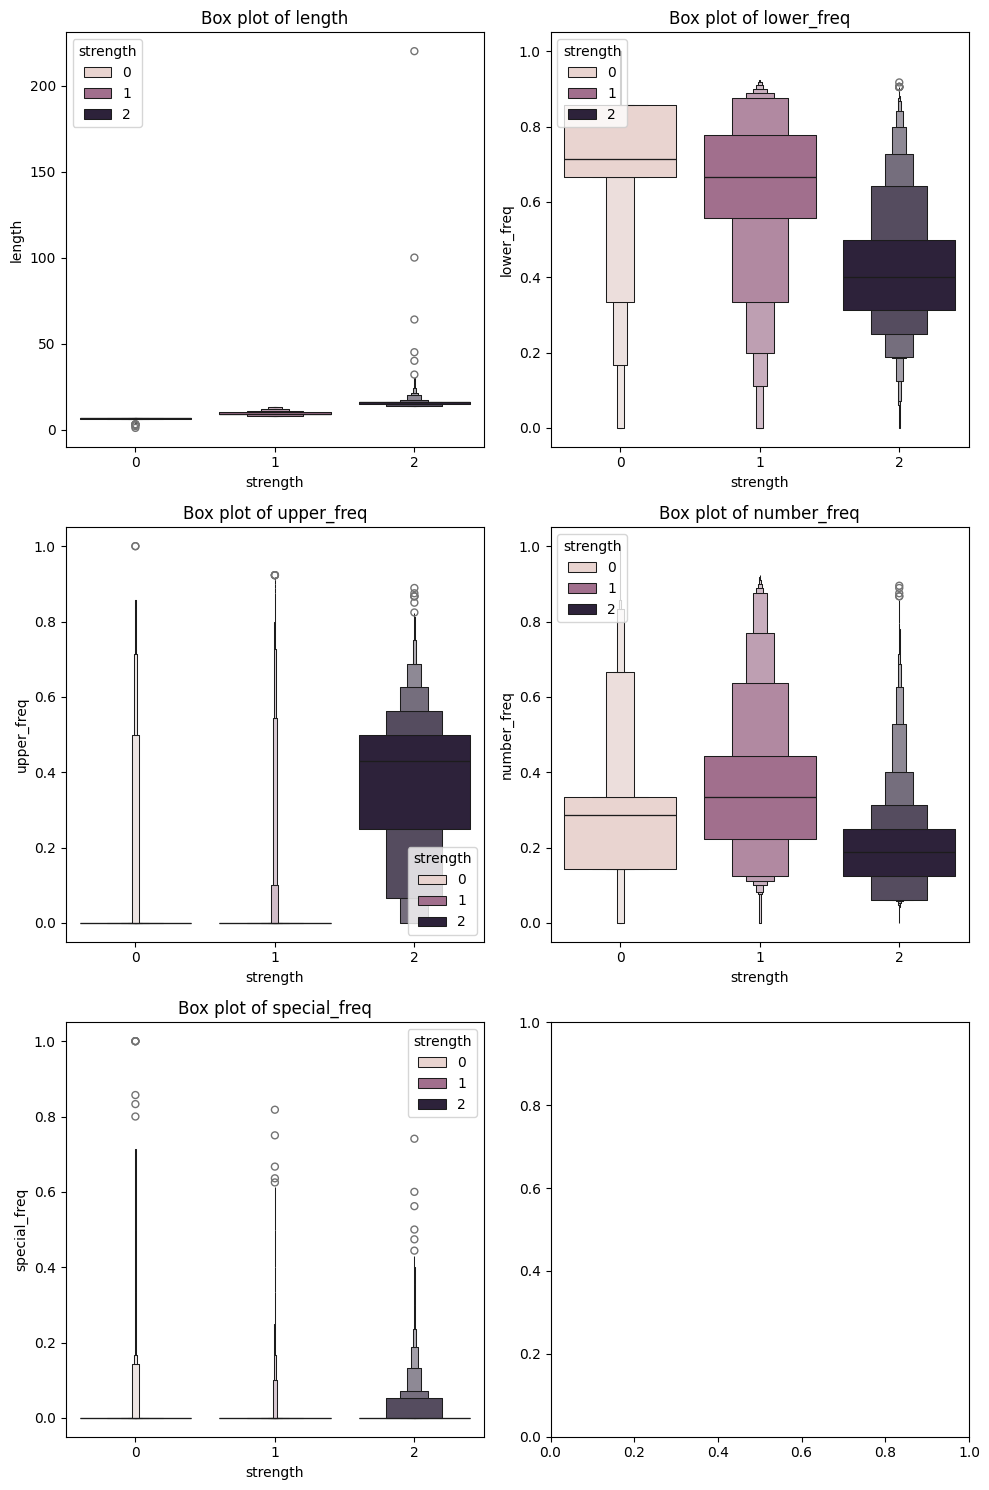

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' and a list of column names 'cols'
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # Create a 3x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(cols):
    sns.boxenplot(x='strength', y=col, hue="strength", ax=axes[i], data=data)
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


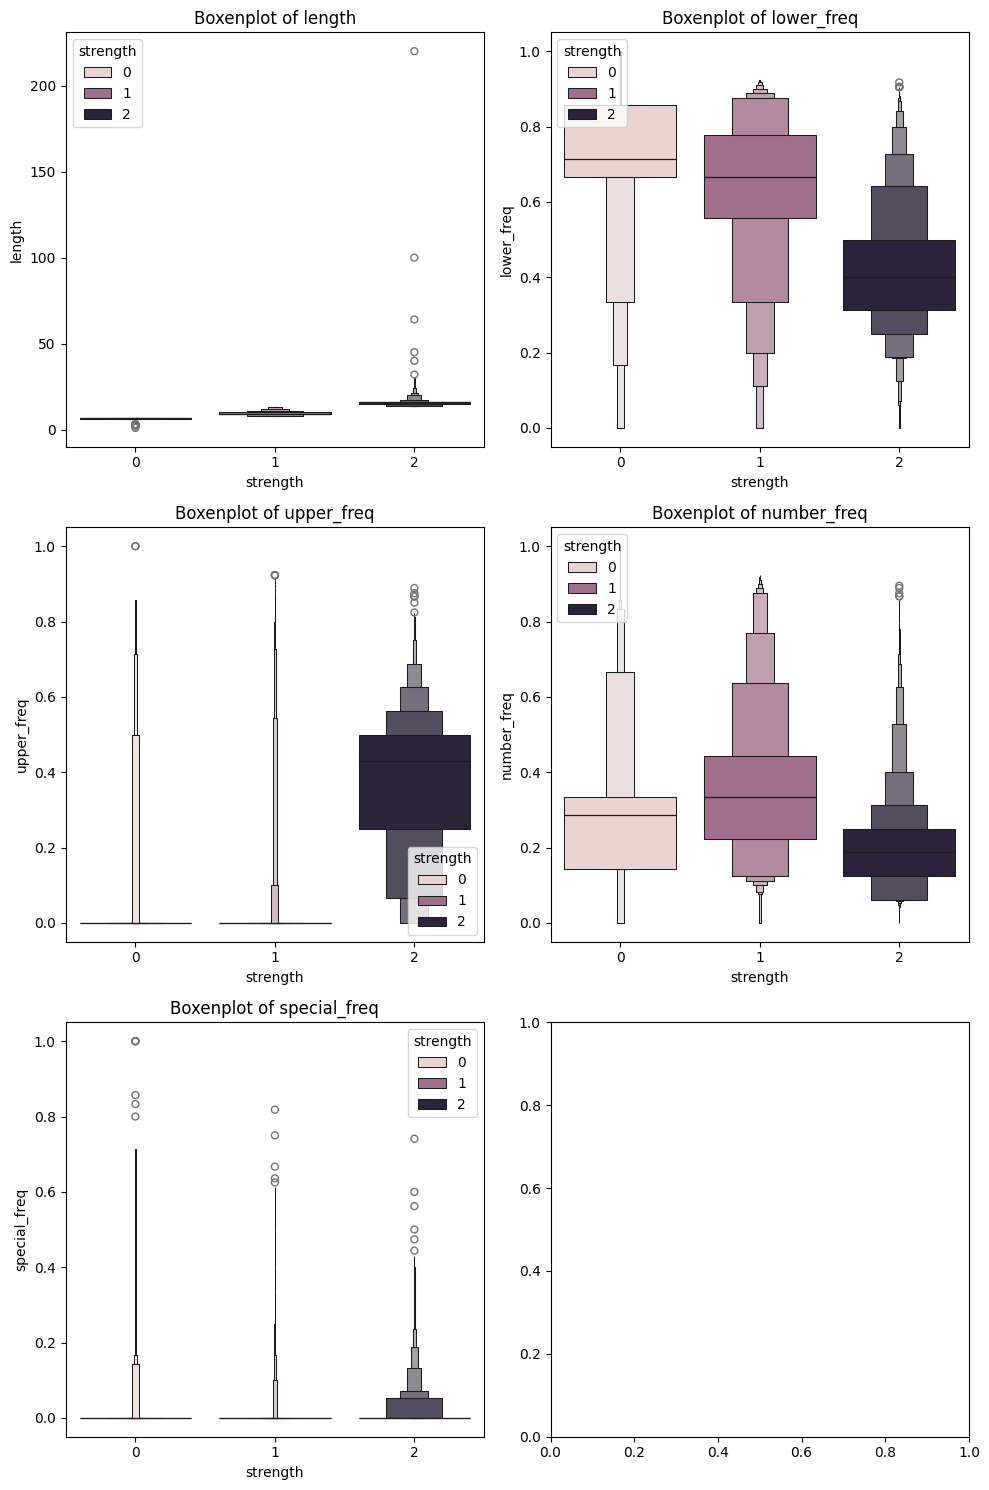

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' and a list of column names 'cols'
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # Create a 3x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(cols):
    sns.boxenplot(x='strength', y=col, ax=axes[i], data=data,hue="strength")
    axes[i].set_title(f'Boxenplot of {col}')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


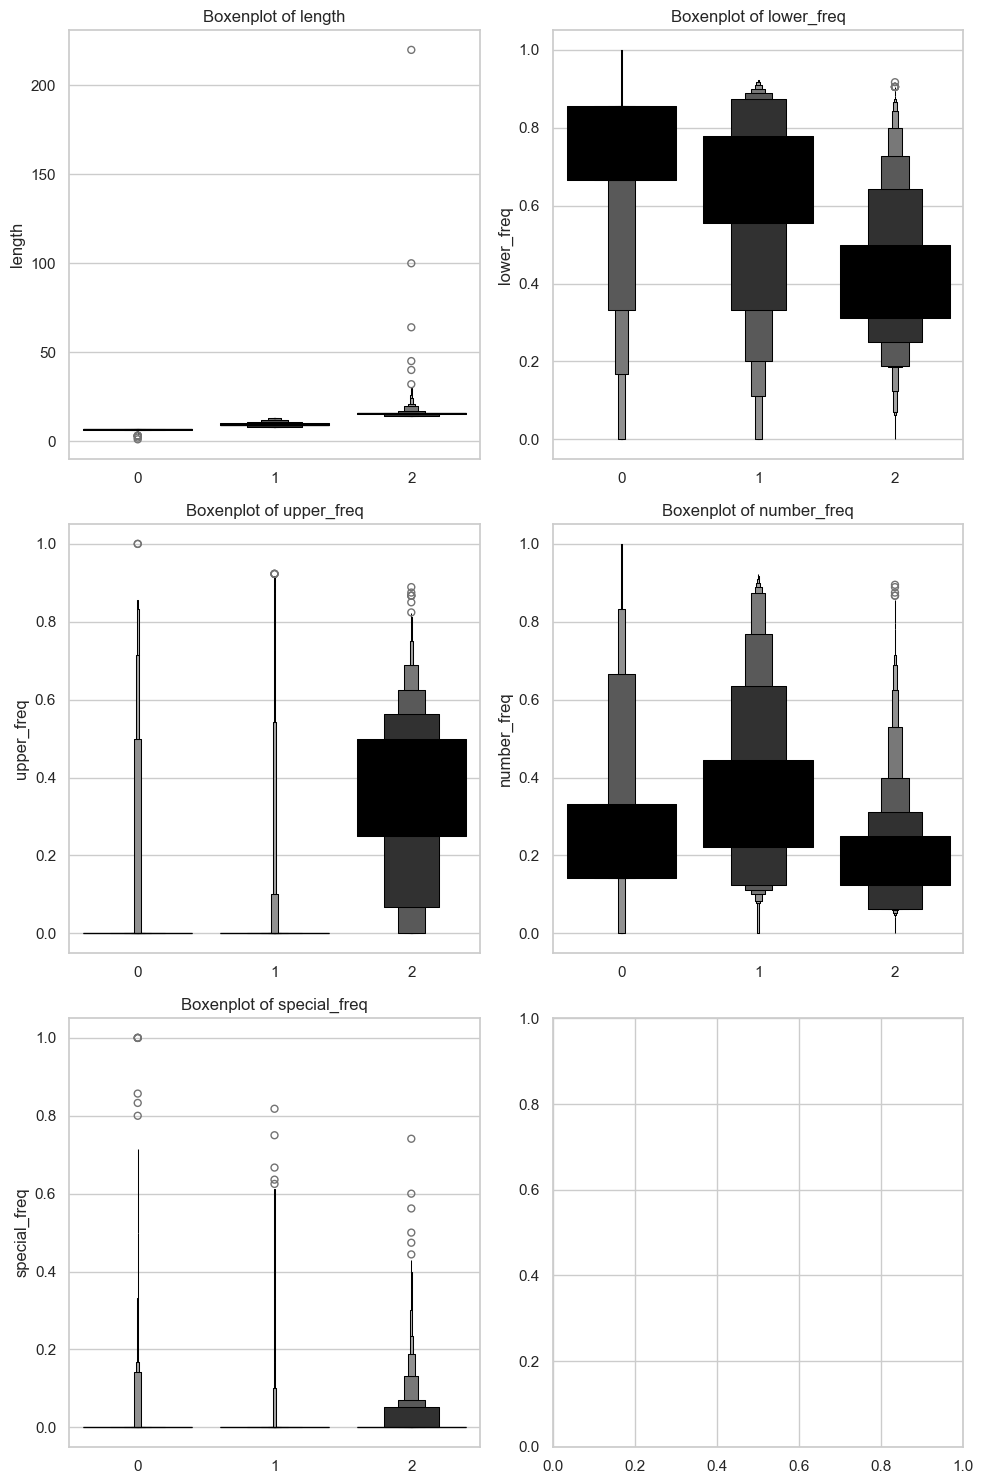

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style to whitegrid
sns.set(style="whitegrid")

# Assuming you have a DataFrame named 'data' and a list of column names 'cols'
fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # Create a 3x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(cols):
    sns.boxenplot(x='strength', y=col, ax=axes[i], data=data, color='black')
    axes[i].set_title(f'Boxenplot of {col}')
    axes[i].set_xlabel('')  # Remove x-labels for better appearance

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


# selecting important features selection 

In [58]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [59]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

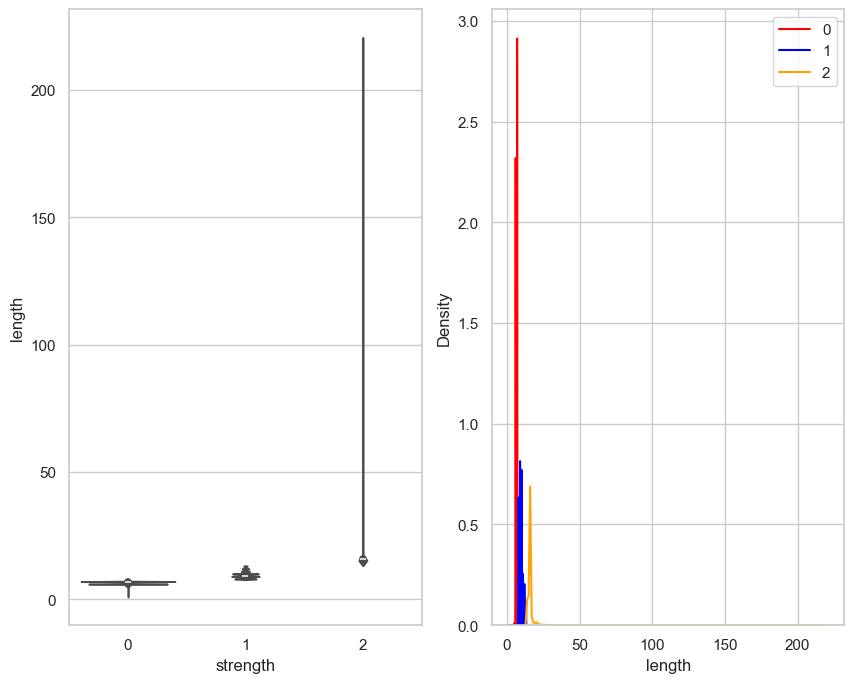

In [60]:
get_dist(data , "length")

In [61]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'number_freq', 'special_freq'],
      dtype='object')

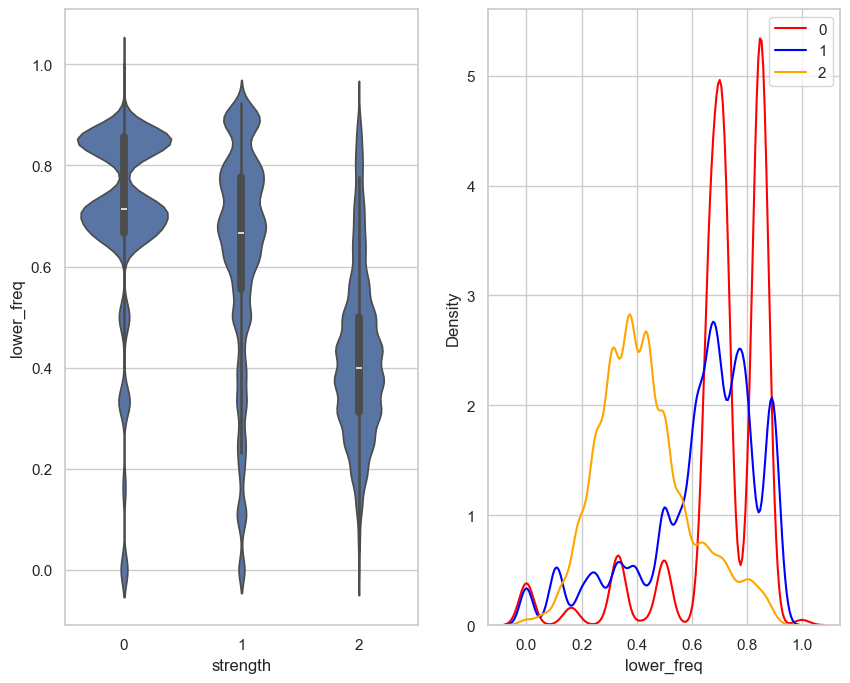

In [62]:
get_dist(data , 'lower_freq')

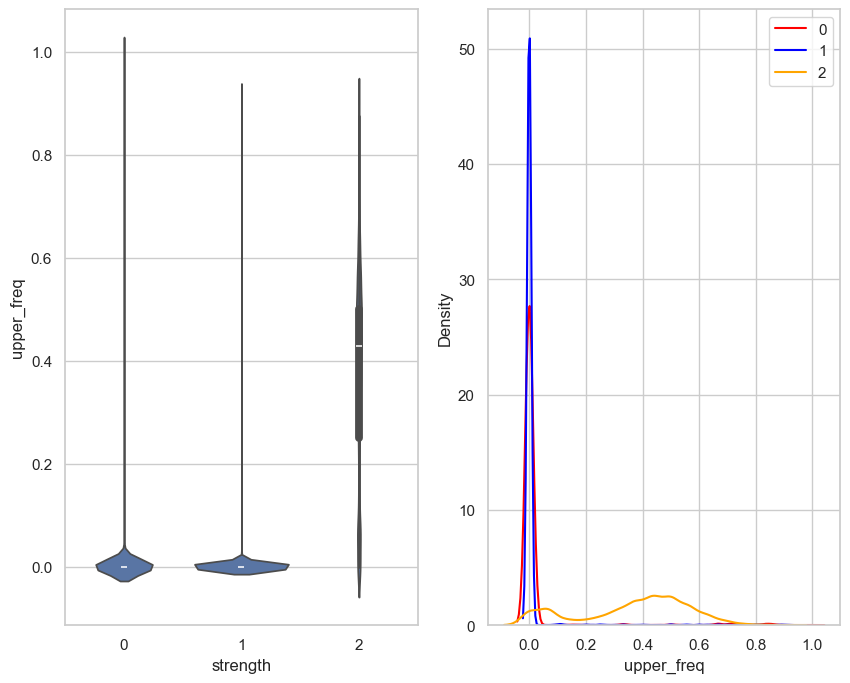

In [63]:
get_dist(data , 'upper_freq')

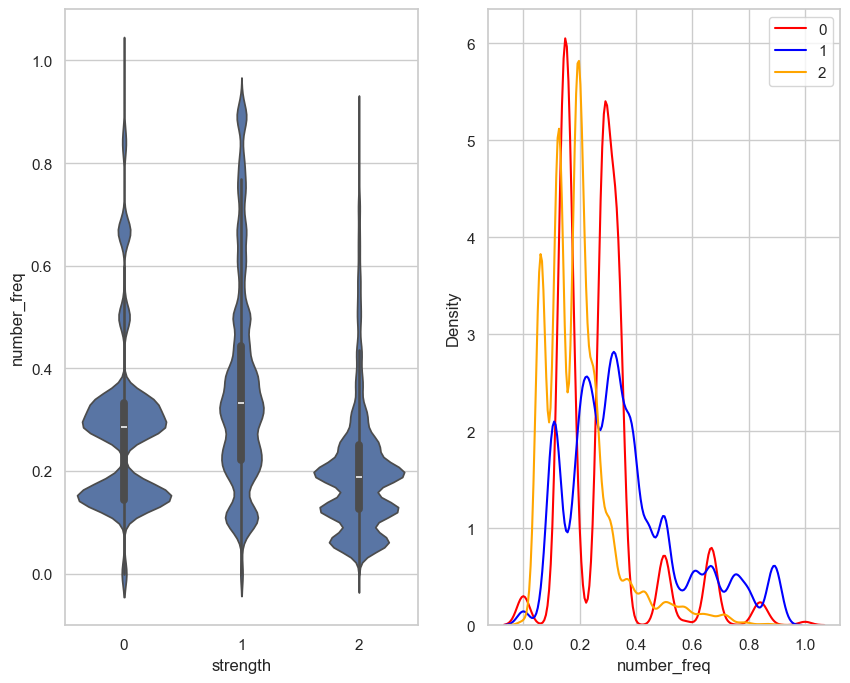

In [64]:
get_dist(data , 'number_freq')

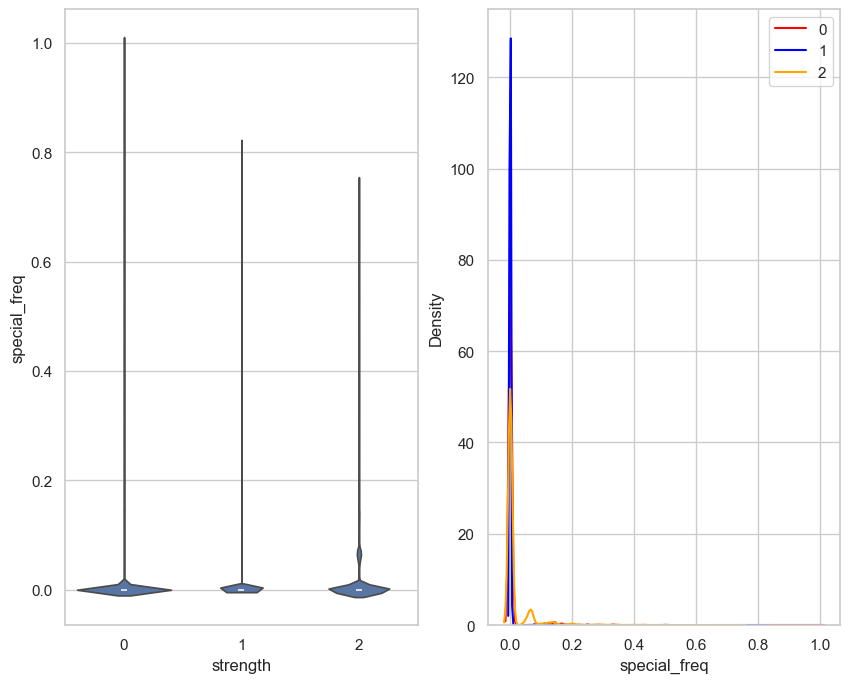

In [65]:
get_dist(data , 'special_freq')

# Applying TF_IDF on data

In [66]:
data.head(4)

,password,strength,length,lower_freq,upper_freq,number_freq,special_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043


In [67]:
data

,password,strength,length,lower_freq,upper_freq,number_freq,special_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000


In [68]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel 

In [69]:
dataframe

,password,strength,length,lower_freq,upper_freq,number_freq,special_freq
4281,vraj21,0,6,0.667,0.000,0.333,0.000
99748,maiselis.com,1,12,0.917,0.000,0.000,0.083
44299,maranata77,1,10,0.800,0.000,0.200,0.000
52459,password99,1,10,0.800,0.000,0.200,0.000
87386,hero74,0,6,0.667,0.000,0.333,0.000
...,...,...,...,...,...,...,...
86490,vkoqsauc6,1,9,0.889,0.000,0.111,0.000
10094,977yFYjejuPamE,2,14,0.500,0.286,0.214,0.000
49255,sambiroto15,1,11,0.818,0.000,0.182,0.000
18345,yxiwuz935,1,9,0.667,0.000,0.333,0.000


In [70]:
x = list(dataframe["password"])

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [72]:
vectorizer = TfidfVectorizer(analyzer="char")

In [73]:
X = vectorizer.fit_transform(x)

In [74]:
X.shape

(100000, 99)

In [75]:
dataframe["password"].shape

(100000,)

In [76]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [77]:
X.toarray()  ### to get entire matrix of TF-IDF for 100000 passwords ..

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
X.toarray()[0] ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30522523, 0.3531308 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.29394286, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.51003601, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.39155151,
       0.        , 0.        , 0.        , 0.53130451, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [79]:
dataframe["password"]

4281             vraj21
99748      maiselis.com
44299        maranata77
52459        password99
87386            hero74
              ...      
86490         vkoqsauc6
10094    977yFYjejuPamE
49255       sambiroto15
18345         yxiwuz935
31862            cl0r0x
Name: password, Length: 100000, dtype: object

In [80]:
len(vectorizer.get_feature_names_out())

99

In [81]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords ..

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [82]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [83]:
df2


,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning algorithm !

In [84]:
dataframe.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'number_freq', 'special_freq'],
      dtype='object')

In [85]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lower_freq']

In [86]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [87]:
y = dataframe["strength"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [89]:
X_train.shape

(80000, 101)

In [90]:
y_train.shape

(80000,)

In [91]:
from sklearn.linear_model import LogisticRegression

## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [92]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [93]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [94]:
y_pred

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
from collections import Counter

In [96]:
Counter(y_pred)

Counter({1: 17011, 2: 1615, 0: 1374})

# Doing prediction on sample data (user-entered input)

In [97]:
password = "%@123abcd"

In [98]:
sample_array = np.array([password])

In [99]:
sample_matrix = vectorizer.transform(sample_array)

In [100]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [101]:
sample_matrix.toarray().shape

(1, 99)

In [102]:
password

'%@123abcd'

In [103]:
len(password)

9

In [104]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [105]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [106]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [107]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [108]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [109]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [110]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [111]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [112]:
predict()

Enter a password : govind@123


'password is strong'

In [113]:
predict()

Enter a password : vijay


'Password is weak'

In [114]:
predict()

Enter a password : kulama23454.


'Password is normal'

# 10.. Model evaluation :

In [115]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [116]:
accuracy_score(y_test , y_pred)

0.801

In [117]:
confusion_matrix(y_test , y_pred)

array([[  724,  1991,     0],
       [  580, 13987,   306],
       [   70,  1033,  1309]], dtype=int64)

In [118]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.27      0.35      2715
           1       0.82      0.94      0.88     14873
           2       0.81      0.54      0.65      2412

    accuracy                           0.80     20000
   macro avg       0.72      0.58      0.63     20000
weighted avg       0.78      0.80      0.78     20000

